# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from time import sleep
import openweathermapy as ow

# for timestamp conversion
from datetime import date

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=5000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=5000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

1399

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:


# Open Log file
f = open("WeatherPyLog.txt", "w+")
f.write("========================\r\n")
f.write("Beginning Data Retrieval\r\n")
f.write("========================\r\n")
# settings for ow 
settings = {"units": "imperial", "appid": api_key}

weather_data = []
wd_cur = []
i = 0
j = 1
SetSize = 50 # Batch size
for city in cities:
    try: 
        # Log the query 
        f.write("Processing Record {} of {}\t| {}\r\n".format(int(i), int(j), str(city)))
        url = "http://api.openweathermap.org/data/2.5/weather?"
        units = "imperial"
        query_url = url + "appid=" + api_key + "&q=" + city + "&units=" + units
        f.write(f"{query_url}\r\n")
        f.flush()
        
        # submit query to ow
        wd_cur = ow.get_current(city, **settings) 
        weather_data.append(wd_cur)
        
    except Exception as inst:
        #
        # Handle 404 error, which means city not found
        # 
        if (inst.code == 404): 
            f.write("City {} not found. Skipping...\r\n".format(str(city)))
        else:
            f.write("Some Other Bad Response Happened...({})\r\n".format(int(inst.code)))
        f.flush()
    
    i += 1
    # Batch queries according to SetSize. Sleep a little if at batch size
    if (i % SetSize == 0):
        i = 0
        j += 1
        sleep(0.10)
# done retrieving data. Close Log file
f.write("========================\r\n")
f.write("Data Retrieval Complete\r\n")
f.write("========================\r\n")
f.close()

# Create an "extracts" object to get the following data from each city:
#     name, cloudiness, country, humidity, latitude, longitude, max temperature, windspeed
summary = ["name", "clouds.all", "sys.country", "dt", "main.humidity", "coord.lat", "coord.lon",
           "main.temp_max", "wind.speed"]
# Create a Pandas DataFrame with the results
data = [response(*summary) for response in weather_data]
column_names = ["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]
weather_data = pd.DataFrame(data, columns=column_names)
weather_data.head()
   

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Qaqortoq,61,GL,1561677095,66,60.72,-46.03,53.60,6.93
1,Hithadhoo,100,MV,1561677096,69,-0.60,73.08,83.77,5.28
2,Vaini,100,IN,1561677096,91,15.34,74.49,77.29,6.04
3,Lingao,86,CN,1561677096,71,19.91,109.69,86.47,21.65
4,Kadoma,75,JP,1561677097,94,34.73,135.60,78.01,8.05


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_data.to_csv(f"{output_data_file}", index=None, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

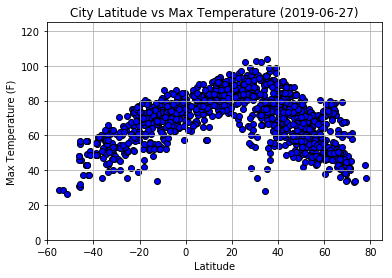

<Figure size 432x288 with 0 Axes>

In [5]:
# Build the scatter plots for each city types
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-60, 85)
plt.ylim(0, 125)
plotdate = date.fromtimestamp(weather_data.iloc[0]["Date"])
plt.title(f"City Latitude vs Max Temperature ({plotdate})")

plt.scatter(weather_data["Lat"], weather_data["Max Temp"], color="blue",
            edgecolors="black")


# add a grid
plt.grid(True)
# Show plot
plt.show()
# Resize plot to display labels
plt.tight_layout()
# Save Figure
plt.savefig("CityLatitudeVsTemperature.png")

#### Latitude vs. Humidity Plot

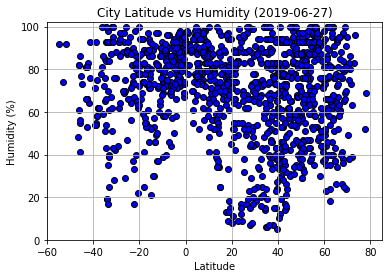

<Figure size 432x288 with 0 Axes>

In [6]:
# Build the scatter plots for each city types
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-60, 85)
plt.ylim(0, 102)
plt.title(f"City Latitude vs Humidity ({plotdate})")

plt.scatter(weather_data["Lat"], weather_data["Humidity"], color="blue",
            edgecolors="black")


# add a grid
plt.grid(True)
# Show plot
plt.show()
# Resize plot to display labels
plt.tight_layout()
# Save Figure
plt.savefig("CityLatitudeVsHumidity.png")

#### Latitude vs. Cloudiness Plot

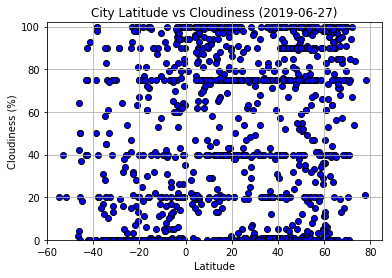

<Figure size 432x288 with 0 Axes>

In [7]:
# Build the scatter plots for each city types
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-60, 85)
plt.ylim(0, 102)
plt.title(f"City Latitude vs Cloudiness ({plotdate})")

plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], color="blue",
            edgecolors="black")


# add a grid
plt.grid(True)
# Show plot
plt.show()
# Resize plot to display labels
plt.tight_layout()
# Save Figure
plt.savefig("CityLatitudeVsCloudiness.png")

#### Latitude vs. Wind Speed Plot

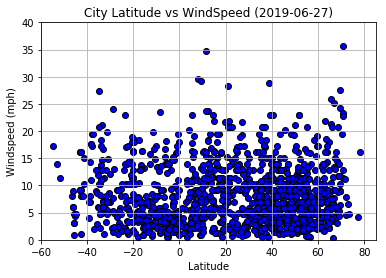

<Figure size 432x288 with 0 Axes>

In [8]:
# Build the scatter plots for each city types
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.xlim(-60, 85)
plt.ylim(0, 40)
plt.title(f"City Latitude vs WindSpeed ({plotdate})")

plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], color="blue",
            edgecolors="black")


# add a grid
plt.grid(True)
# Show plot
plt.show()
# Resize plot to display labels
plt.tight_layout()
# Save Figure
plt.savefig("CityLatitudeVsWindSpeed.png")